# Classificazione origine degli oli dataset Idrocarburi principale

In [1]:
# librerie di base
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
# librerie algoritmi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(42)

### Caricamento del Dataset

In [3]:
df = pd.read_csv('../dataset/df_media_TIC_Idro_min_1-40.csv')

### Dividiamo i dati in X (features) e y (target) e creiamo una copia scalata

In [4]:
# divido il dataset in X (feature, dalla colonna 2 in poi) e y_origine (target, colonna 1)
X = df.iloc[:, 2:]
y_origine = df.iloc[:,0]
scaler = MinMaxScaler()
X_scalati = scaler.fit_transform(X)

### Calcolo dei pesi delle classi

In [5]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_origine), y=y_origine)
class_weight_dizionario = dict(zip(np.unique(y_origine), class_weights))
class_weight_dizionario

{'grecia': 3.0714285714285716,
 'grecia - peloponneso': 1.3354037267080745,
 'grecia-creta': 0.7142857142857143,
 'italia': 1.096938775510204,
 'portogallo': 3.0714285714285716,
 'spagna': 0.3338509316770186,
 'tunisia': 3.4126984126984126}

## KNN con validazione incrociata

### KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y_origine, cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7963203463203463


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [7]:
#predizioni = cross_val_predict(knn, X, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
#skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
#plt.xticks(rotation=-90)
#plt.show()


### KNN su dati scalati

In [8]:
knn_scale = KNeighborsClassifier()
scores = cross_val_score(knn_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7965367965367964


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [9]:
#predizioni_scalati = cross_val_predict(knn_scale, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni_scalati))
#skplt.metrics.plot_confusion_matrix(y_origine, predizioni_scalati)
#plt.xticks(rotation=-90)
#plt.show()

## SVM (Support Vector Machine) con validazione incrociata


### SVC

In [10]:
svc = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8058441558441558


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [11]:
#predizioni = cross_val_predict(svc, X, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
#skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
#plt.xticks(rotation=-90)
#plt.show()

### SVC su dati scalati

In [12]:
svc_scale = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7963203463203463


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


### SVC con bilanciamento del modello

In [13]:
svc_w = SVC(kernel='poly', C=1, class_weight=class_weight_dizionario)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.7645021645021645


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


## RandomForest con convalida incrociata

In [14]:
rand_for = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8374458874458874


In [15]:
#predizioni = cross_val_predict(rand_for, X, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
#skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
#plt.xticks(rotation=-90)
#plt.show()

### Random Forest con dati scalati

In [16]:
rand_for_scale = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8422077922077922


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


                      precision    recall  f1-score   support

              grecia       1.00      0.10      0.18        10
grecia - peloponneso       0.78      0.78      0.78        23
        grecia-creta       0.88      0.98      0.92        43
              italia       0.89      0.86      0.87        28
          portogallo       0.60      0.30      0.40        10
              spagna       0.84      0.95      0.89        92
             tunisia       1.00      0.78      0.88         9

            accuracy                           0.85       215
           macro avg       0.85      0.68      0.70       215
        weighted avg       0.85      0.85      0.83       215



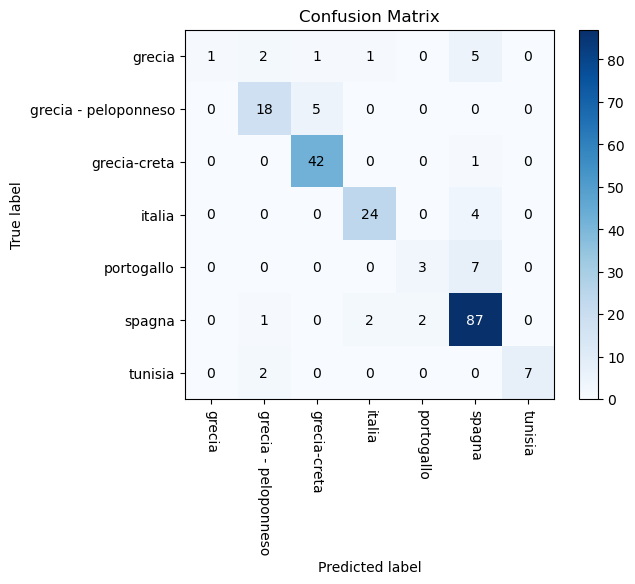

In [17]:
predizioni = cross_val_predict(rand_for_scale, X_scalati, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

### Random Forest con bilanciamento del modello

In [18]:
rand_for_w = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8380952380952381


### Random Forest con bilanciamento del modello e con dati scalati

In [19]:
rand_for_w_scale = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8235930735930734


# I risultati ottenuti sono peggiori o uguali a quelli ottenuti con il dataset VOCs principale